In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [19]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Conv2D(16,(3,3),activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])


In [20]:
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [59]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation = 'softmax')
])


In [60]:
# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [61]:
# Define the model optimizer, loss function and metrics

adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003)
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy','mae'])



In [62]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f72a87ca978>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f72a87b70f0>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [29]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [34]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [35]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [36]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.


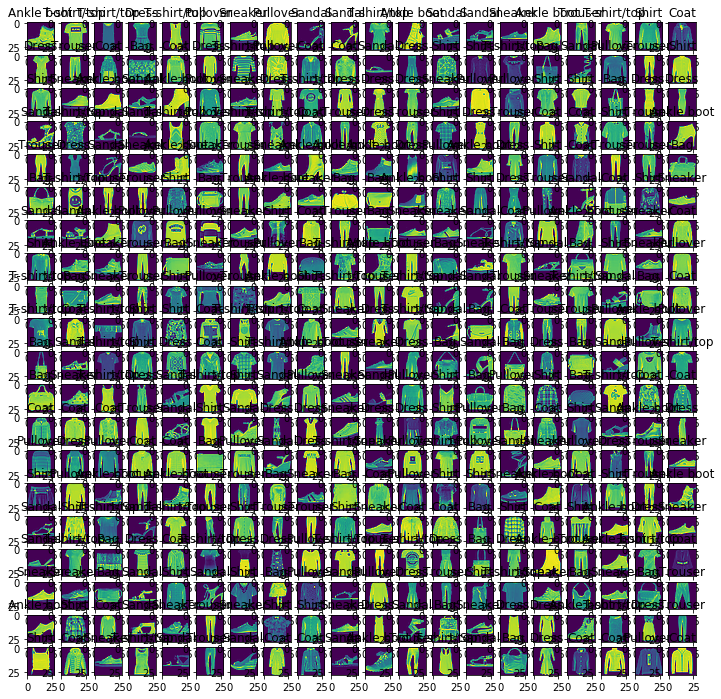

In [49]:
# Display one of the images

fig, axes = plt.subplots(20, 20, figsize=(12,12))

idx = 0
for row in range(20):
    for col in range(20):
        axes[row,col].imshow(train_images[idx,:,:])
        axes[row,col].title.set_text(labels[train_labels[idx]])
        idx += 1
        

#### Fit the model

In [63]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels,epochs = 5,batch_size = 256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 818us/sample - loss: 0.8695 - accuracy: 0.7224 - mae: 4.4200
Epoch 2/5
60000/60000 [==============================] - 48s 802us/sample - loss: 0.4853 - accuracy: 0.8273 - mae: 4.4200
Epoch 3/5
60000/60000 [==============================] - 48s 807us/sample - loss: 0.4294 - accuracy: 0.8501 - mae: 4.4200
Epoch 4/5
60000/60000 [==============================] - 48s 803us/sample - loss: 0.4004 - accuracy: 0.8603 - mae: 4.4200
Epoch 5/5
60000/60000 [==============================] - 48s 793us/sample - loss: 0.3816 - accuracy: 0.8666 - mae: 4.4200


#### Plot training history

In [64]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(data = history.history)
df


,loss,accuracy,mae
0,0.869453,0.722383,4.419999
1,0.485253,0.827283,4.419999
2,0.429433,0.850133,4.420000
3,0.400429,0.860317,4.420000
4,0.381581,0.866550,4.420000


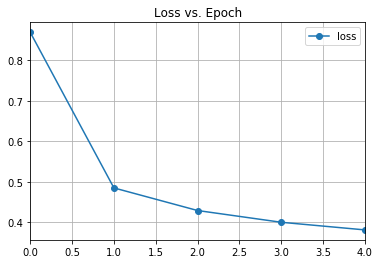

In [70]:
# Make a plot for the loss
df.plot(y = "loss",grid = True,title = "Loss vs. Epoch",style = ['o-'])


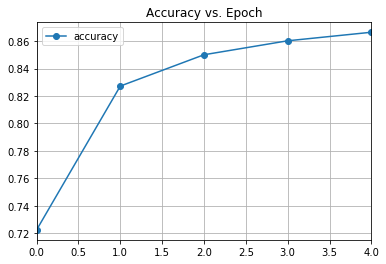

In [71]:
# Make a plot for the accuracy
df.plot(y = "accuracy",grid = True,title = "Accuracy vs. Epoch",style = ['o-'])


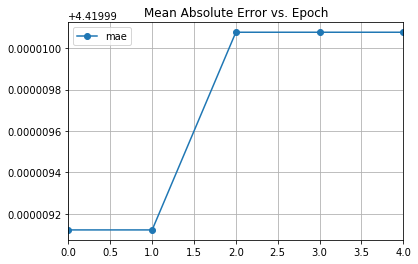

In [72]:
# Make a plot for the additional metric
df.plot(y = "mae",grid = True,title = "Mean Absolute Error vs. Epoch",style = ['o-'])


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [73]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [75]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis],test_labels, verbose = 2)


10000/1 - 5s - loss: 0.3537 - accuracy: 0.8609 - mae: 4.4200


[0.3939383990049362, 0.8609, 4.419997]

#### Make predictions from the model

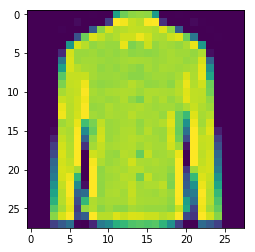

Label: Shirt


In [78]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

